# PHY1024 - Introduction to Python Programming, week 2

The lecture materials, worksheets, and assignments can all be found here:

http://go.qub.ac.uk/phy1024y2016


## Lecture materials

### Random numbers

A lot of what we do in the physical sciences is influenced by random processes at some level. Some of those randomizing effects are caused by us not knowing everything about a system, others are just fundamentally random in nature. Examples:

  * decay of a radioactive atom - random when it happens (fundamentally random)
  * looking at a patch of sky and waiting for a supernova to happen (random because we don't know the evolutionary state of each star in detail)
  * measuring the same quantity multiple times and getting slighltly different results: the "randomness" is then caused by the limited accuracy of our measurement (random because we don't know when we make a small mistake and in which direction it goes).


-> When we want to model physical systems computationally, we need some way of modelling randomness!

However, it is actually a bit tricky to get real randomness out of a computer.

How can we create a sequence of random numbers? There are two fundamental ways of doing that:

  * Random number generators:
  
    These are actual physical processes that have a random outcome. They are "true" random generators. Examples:
      * tossing a coin
      * rolling dice
      * waiting for a Uranium atom to decay (random when it happens)
      
  
  * Pseudo-random number generators
    
    These are deterministic ways in which a mathematical formula, or an algorithm, produces a sequence of numbers that *look* like they are random numbers. However, they are deterministic in the sense that we can reproduce the exact sequence of numbers when we choose the same start point (called "seed"). So they are not really random.


Computers use pseudo-random number generators. We will look at a few ways how this can be done.

#### Example 1: The Middle-Square-Method

This is a really old idea how to generate a sequence of seemingly random numbers. In comparison to modern methods, it's not very good, and we'll see why in a little bit. However, it is *really* old: the first known reference to this method is from the year 1250, written down by a Franciscan monk named Brother Edvin. The method was re-discovered by John von Neumann in 1949 and made popular in a programming context.


This is how it works. Let's say we want to generate pseudo-random numbers that have 4 digits.

1) Choose a number with 4 digits. For example, 1546.

2) Calculate the square of that number:

In [1]:
print 1546**2

2390116


3) If this new number has less than 8 digits, add zeros in front of it until it has 8 digits. So, in this case, our new number is:

02390116.

4) Discard the first two and the last two digits and only keep the middle four digits:

~~02~~3901~~16~~

This leaves us with:

3901.

5) This is our new "random" number. This new number, 3901, is then used to create the next number in the "random" sequence.

This is not a very good pseudo-random number generator. Any idea why?

What happens if we arrive at a number where the middle 4 digits of the square are all zeros?

Right - all subsequent numbers will be zeros again, and the random sequence gets stuck.



This algorithm can also easily get stuck on other numbers. For example, let's say we start with the number 2500. Then we get:

2500 -> squared -> 06250000 -> new number 2500


Some other numbers form very short cycles that repeat forever once you hit one of the numbers inside the cycle:

0540 -> squared -> 00291600 -> new number 2916

2916 -> squared -> 08503056 -> new number 5030

5030 -> squared -> 25300900 -> new number 3009

3009 -> squared -> 09054081 -> new number 0540. Full circle.


This particular algorithm gets worse if we want to create pseudo-random numbers with fewer digits, say only 2 digits. Then a sequence could go:

13 -> squared -> 0169 -> new number 16.

The longest number of steps that exists for the middle-square algorithm with 2-digit numbers before we enter a cycle is 14.

#### Example 2: The modulo method. Official name: "Linear congruential generator"

The *modulo* is the rest that remains when you divide one integer number by another integer number. It is abbreviated as "mod".

For example, 

5 mod 2 = 1,

because 5 divided by 2 is 2 plus a rest of 1. (5 = 2 x 2 + 1).

6 mod 2 = 0,

because 6 divided by 2 is 3 plus a rest of 0. (6 = 3 x 2).

The modulo can be used to generate pseudo-random numbers like this:

1) Choose 3 large integer numbers a, b, and m. Let's say a = 123456, b = 987654, and m = 192837.

2) Choose a start number X for the sequence, say X = 100.

3) Calculate the next number in the sequence according to this formula:

X_new = (aX + b) mod m

We will write a program in the worksheet for this week that calculates a sequence of pseudo-random numbers with the modulo method.

All the methods we have looked at so far generate pseudo-random numbers that are roughly *uniformly distributed* between two values. For the middle-square method, the borders for the created numbers are 0 and 9999 (for the 4-digit version), and for the modulo method, it is numbers between 0 and whatever we have chosen for m.

This is what such a random number distribution can look like graphically. I am using a very well-working built-in function of python's numpy package for this to create uniformly distributed numbers between 0 and 10 (using real numbers, not integer numbers, so values like 5.448 are allowed).

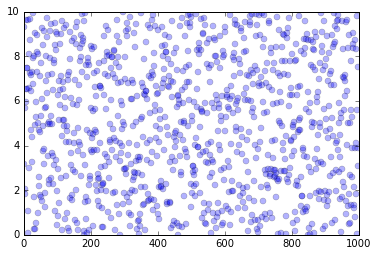

In [9]:
import numpy as np
import matplotlib.pyplot as plt
# this next line is only necessary for ipython notebooks
%matplotlib inline

np.random.seed(12345) # This makes python repeat the same numbers every time we run the program.
# I can choose any number to go inside the brackets of "seed".

my_numbers = np.random.uniform(low=0, high=10, size=1000)

plt.figure()
plt.plot(np.arange(0, len(my_numbers)), my_numbers, 'o', alpha=0.3)
# The alpha=0.3 modifier makes the symbols slightly transparent so that we can see the density of the data points better.
plt.show()

In physics, we often want our numbers to be random, but *not* uniformly distributed. For example, measurement errors in physics often follow a Gaussion or "normal" distribution. This means that we will very often measure something that is close to the mean value of all our measurements, and only rarely we will mess up our measurement so badly that we get a very extreme outlier.

So in the end we would like to get something that looks like this (I'm again using a built-in python function for convenience):


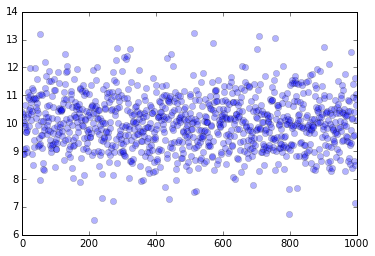

In [36]:
np.random.seed(9876)

gaussian_numbers = np.random.normal(loc=10, scale=1, size=1000)
# loc is where we want the mean of the numbers to be,
# and scale is a measure for how wide the numbers should scatter around that mean.

plt.figure()
plt.plot(np.arange(0, len(gaussian_numbers)), gaussian_numbers, 'o', alpha=0.3)
plt.show()

The way computer algorithms do this is by starting with a uniformly distributed sequence of pseudo-random numbers, and then transforming those into a distribution that follows the Guassian distribution. This is mathematically surprisingly difficult, but can be done with some sophisticated algorithms. (For future reference, one has to use the *inverse cumulative distribution function* of the respective probability distribution. These words will start making sense once you will have learned more about statistics in higher semesters.)

What we need to know for now is that a Gaussian distribution is mathematically described by this formula:

## $ f(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}} $

with $\mu$ being the number where we want the mean of the distribution to be, and $\sigma$ being a measure for the width of the distribution, i.e. the scatter of the data points around $\mu$ in our pseudo-random sequence.

### Plotting a histogram of our pseudo-random data

We will deal quite often with histograms when we are working with sequences of (pseudo-)random numbers.

A histogram is a graphical representation of the distribution of data points.

A good example is the distribution of marks on an exam. Let's say marks are measured in percent, and we have 10 students with the following marks:


In [6]:
marks = np.array([71, 94, 54, 34, 82, 76, 68, 79, 98, 68])

A condensed version of looking at that data is to look at how many students achieved a mark in a certain range, called "bin". Let's say we are interested in bins of width 10, and they go from 0 to 10, 10 to 20, and so on. 

Then we have:

| bin        | \# of students |
| ---------- |:--------------:|
| 0-10       | 0              |
| 10-20      | 0              |
| 20-30      | 0              |
| 30-40      | 1              |
| 40-50      | 0              |
| 50-60      | 1              |
| 60-70      | 2              |
| 70-80      | 3              |
| 80-90      | 1              |
| 90-100     | 2              |



A histogram of this binned data then looks like this:

(array([ 0.,  0.,  0.,  1.,  0.,  1.,  1.,  4.,  1.,  2.]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

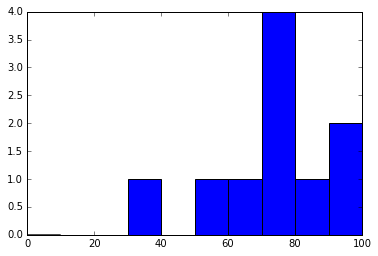

In [7]:
plt.figure()
plt.hist(marks, bins=np.arange(0, 101,10))

Python's matplotlib package calculated a histogram for us and plots it at the same time. The command for this is, as seen above, "plt.hist", and we need to give inside the round brackets the raw data (here "marks"), and the edges of the bins we want. np.arange(0, 101,10) is the integer numbers from 0 to one smaller than 101, in steps of 10, i.e. [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100].


We can also decide to use larger bins with width 20, then the histogram will look like this:

(array([ 0.,  1.,  1.,  5.,  3.]),
 array([  0,  20,  40,  60,  80, 100]),
 <a list of 5 Patch objects>)

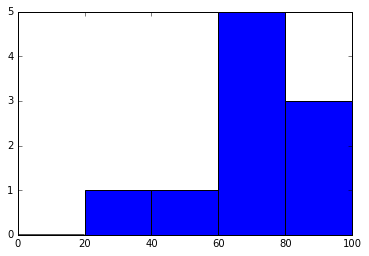

In [8]:
plt.figure()
plt.hist(marks, bins=np.arange(0, 101,20))

## Worksheet materials

### Uniformly distributed pseudo-random numbers with the modulo method

Let's make our own pseudo-random number generator. We'll use the modulo method for this.

Remember, we need to choose 3 large integer a, b, and m, and a start number X, and then we calculate the next number like this:

X_new = (aX + b) mod m

#### Exercise 1: 

1a) Write a function called random_modulo which takes a, b, and m as variables, and also takes some start number X and the desired length L of the random sequence as variables (so in total the function needs 5 variables).

Then create a sequence starting with the number 100 and having a total length of 1000 numbers, using your function.

1b) Plot those values graphically, like we did in the examples above. Does the plot look random? Are there repeating patterns?

1c) Play around with the values for a, b, and m, and find a few combinations which give very random-looking plots, and others which have some patterns in them. For which kind of numbers do you tend to get good (random) or bad (pattern-like) results?


Remember, these are the packages you will need to import at the beginning of your python script to enable numpy built-in functions and plotting with matplotlib:

In [43]:
import numpy as np
import matplotlib.pyplot as plt

### Gaussian-distributed pseudo-random numbers, and plotting a histogram

#### Exercise 2:

Now we want to create Gaussian-distributed random numbers, using a python built-in function. We then want to plot a histogram of that (pseudo-)random data to see if it actually looks like a Gaussian.

For this we use the function "np.random.normal".

2a) Choose a value for the mean of your distribution and for the spread of the distribution, and then produce 1000 pseuso-random numbers with this command:

randomgauss = np.random.normal(loc=your_chosen_mean, scale=your_chosen_spread, size=total_number_of_data_points)

2b) Plot a histogram of your array "randomgauss", using the function "plt.hist". You can either tell python how many bins you would like in total, and then python chosses where the first bin starts and the last bin ends, or you can explicitly tell python the edges of your bins.

Try both options:

The first option would be, for example

plt.hist(randomgauss, bins=30)

for a histogram with 30 bins, starting at the smallest data point and ending at the largest data point (python chooses the bins automatically so that it fits).

The second option would be (but you have to actually adjust this to your numbers!!!):

plt.hist(randomgauss, bins=np.arange(0, 100, 0.5))

for a histogram going from 0 to 99 with a stepsize of 0.5. But if you chose values for your_chosen_mean and your_chosen_spread that are outside that range, you won't see anything! So if you do this by hand, you have to make the range of the histogram bins match your actual pseudo-random data points.
